In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [3]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


• [10 pts] An aggregate of the movie ratings for each particular genre, e.g., Action, Adven- ture, Drama, Science Fiction, ...

In [0]:
# merging data of all the three tables
fin_data = pd.merge(pd.merge(ratings, users), movies)

In [7]:
# small data preprocessing step -> checking for any null data
fin_data.isnull().any()

user_id       False
movie_id      False
rating        False
timestamp     False
gender        False
age           False
occupation    False
zip           False
title         False
genres        False
dtype: bool

In [0]:
# This function is t0 extract all genre data
def count_genre(dataset, col, listkey):
    count = dict()
    for s in listkey: count[s] = 0
    # split data in genre list
    for list_key in dataset[col].str.split('|'):
        if type(list_key) == float and pd.isnull(list_key): continue
        for s in list_key: 
            if pd.notnull(s): count[s] += 1
    #list to keep the values
    genre_occurences = []
    #appending the values
    for k,v in count.items():
        genre_occurences.append([k,v])
    genre_occurences.sort(key = lambda x:x[1], reverse = True)
    return genre_occurences, count

In [9]:
genre_labels = set()
for s in fin_data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

#store the unique values account
genre_occurences, count = count_genre(fin_data, 'genres', genre_labels)
genre_occurences

[['Comedy', 356580],
 ['Drama', 354529],
 ['Action', 257457],
 ['Thriller', 189680],
 ['Sci-Fi', 157294],
 ['Romance', 147523],
 ['Adventure', 133953],
 ['Crime', 79541],
 ['Horror', 76386],
 ["Children's", 72186],
 ['War', 68527],
 ['Animation', 43293],
 ['Musical', 41533],
 ['Mystery', 40178],
 ['Fantasy', 36301],
 ['Western', 20683],
 ['Film-Noir', 18261],
 ['Documentary', 7910]]

#[10 pts] An aggregate of the movie ratings for each particular genre, e.g., Action, Adven- ture, Drama, Science Fiction, ...

In [10]:
data = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')
#merging just rating and movies data
movie_data_ratings_data=data.merge(ratings,on = 'movie_id',how = 'inner')
movie_data_ratings_data.head(3)

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496


In [11]:
# iterating through all genres and calculating averages
for i in range(0, len(genre_occurences)):
  print(genre_occurences[i][0])
  gen = movie_data_ratings_data['genres'].str.contains(genre_occurences[i][0])
  new_data = pd.DataFrame(movie_data_ratings_data[gen])
  print(new_data['rating'].mean())

Comedy
3.522098827752538
Drama
3.766332232342065
Action
3.4911849357368414
Thriller
3.5704660480809784
Sci-Fi
3.466521291339784
Romance
3.607464598740535
Adventure
3.477256948332624
Crime
3.708678543141273
Horror
3.215013222318226
Children's
3.422034743579087
War
3.893326717935996
Animation
3.684868223500335
Musical
3.6655189849035708
Mystery
3.6681019463387923
Fantasy
3.447370595851354
Western
3.6377701493980563
Film-Noir
4.075187558184108
Documentary
3.933122629582807


# [10 pts] The top 5 highest ranked genre by women.

In [0]:
# extracting just Female data and they calculating the average ratings per genre
female_data = fin_data.loc[fin_data['gender'] == 'F']
fem_data = {}
for i in range(0, len(genre_occurences)):
  #print(genre_occurences[i][0])
  gen = female_data['genres'].str.contains(genre_occurences[i][0])
  new_data = pd.DataFrame(female_data[gen])
  #print(new_data['rating'].mean())
  #new_data has the genre data and we calculated the mean of the genre
  fem_data[genre_occurences[i][0]] = new_data['rating'].mean()

In [13]:
sorted_fem = {k: v for k, v in sorted(fem_data.items(), key=lambda item: item[1], reverse=True)}
count = 0
for k, v in sorted_fem.items():
  if count < 5:
    print(k)
    print(v)
    count = count + 1

Film-Noir
4.018086625416468
Documentary
3.94639175257732
War
3.893138437522174
Musical
3.8091077378748612
Drama
3.7656617729463187


#[10 pts] The top 5 highest ranked genre by men

In [0]:
# extracting just Male data and they calculating the average ratings per genre
male_data = fin_data.loc[fin_data['gender'] == 'M']
male_dict = {}
for i in range(0, len(genre_occurences)):
  #print(genre_occurences[i][0])
  gen = male_data['genres'].str.contains(genre_occurences[i][0])
  new_data = pd.DataFrame(male_data[gen])
  #print(new_data['rating'].mean())
  #new_data has the genre data and we calculated the mean of the genre
  male_dict[genre_occurences[i][0]] = new_data['rating'].mean()

In [0]:
sorted_male = {k: v for k, v in sorted(male_dict.items(), key=lambda item: item[1], reverse=True)}
for k, v in sorted_fem.items():
  if count < 5:
    print(k)
    print(v)
    count = count + 1

#[20 pts] Pick a movie of your choice and provide a breakdown of the movie’s ratings by 3 age ranges (a) under 18 (b) 19 to 45 (c) Above 45.

In [0]:
# Movie of choice : "Toy Story (1995)" extracting its record from movies table
toy_story = movies.loc[movies['title'] == 'Toy Story (1995)']

In [0]:
user_data = pd.read_table('users.dat', sep='::', header=None, names=mnames, engine='python')
#user_data_ratings_data= user_data.merge(ratings,on = 'user_id',how = 'inner')
# merging user and ratings table
user_data_ratings_data = pd.merge(left=users, right=ratings, left_on='user_id', right_on='user_id')
#gen = movie_data_ratings_data['genres'].str.contains(genre_occurences[i][0])
# sending the toy_story movie id to the merged table to get all user rating to that movie
rating_gen = user_data_ratings_data.loc[user_data_ratings_data['movie_id'] == toy_story['movie_id'].values[0]]

In [0]:
# spliting the particular movie table to three tables according to the ages category
rating_below = rating_gen.loc[rating_gen['age'] < 19]
rating_mid = (rating_gen.loc[rating_gen['age'] > 18]).loc[(rating_gen.loc[rating_gen['age'] > 18])['age'] < 46]
rating_above = rating_gen.loc[rating_gen['age'] > 45]

In [19]:
# checking averages of the ages data
print('Average rating in the mentioned age groups :')
print('Age below 18:')
print(rating_below['rating'].mean())
print('Age between 19 to 45:')
print(rating_mid['rating'].mean())
print('Age above 45:')
print(rating_above['rating'].mean())

Average rating in the mentioned age groups :
Age below 18:
3.9982142857142855
Age between 19 to 45:
4.222713864306785
Age above 45:
4.024844720496894


In [20]:
# checking standard deviation of the ages data
print('Standard deviation of the  rating in the mentioned age groups :')
print('Age below 18:')
print(rating_below['rating'].std())
print('Age between 19 to 45:')
print(rating_mid['rating'].std())
print('Age above 45:')
print(rating_above['rating'].std())

Standard deviation of the  rating in the mentioned age groups :
Age below 18:
0.8962236558461483
Age between 19 to 45:
0.8135115504952557
Age above 45:
0.935082286212062


In [21]:
rating_gen.groupby('age').size()

age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

#[30 pts] A function that given a user id and movie id , returns a list of user ids for other users that rated the movie identified by the provided movie id with the same score. 

In [0]:
def other_user(user_id, movie_id):
  # get record of the movie_id and user_id to know the rating
  curr_user = (ratings.loc[ratings['user_id'] == user_id]).loc[(ratings.loc[ratings['user_id'] == user_id])['movie_id'] == movie_id]
  movie_data = ratings.loc[ratings['movie_id'] == movie_id]
  # using the rating to get all similar rating values
  same_score = movie_data.loc[movie_data['rating'] == curr_user['rating'].values[0]]
  unique_users = same_score['user_id'].unique()
  return unique_users
    

In [23]:
user = other_user(1,1)
print("The userds are :")
print(user)
print('The count of users are:')
print(len(user))

The userds are :
[   1    9   10   19   34   36   38   44   49   51   56   65   75   76
  112  119  121  132  146  148  156  157  162  169  182  184  186  195
  198  213  220  223  231  239  246  258  272  273  284  300  301  307
  325  333  343  346  350  369  385  389  411  413  429  434  438  451
  456  463  474  478  479  496  523  524  528  529  531  536  541  543
  549  550  555  563  577  583  590  605  606  610  613  623  626  634
  635  637  641  645  646  669  676  678  690  692  707  710  714  716
  718  722  726  729  731  733  739  749  752  753  765  776  791  801
  802  813  817  822  839  840  858  869  877  880  885  890  891  894
  926  929  933  934  938  946  949  951  957 1000 1004 1015 1021 1032
 1036 1051 1054 1055 1057 1059 1061 1072 1076 1087 1107 1112 1117 1124
 1125 1132 1141 1145 1155 1183 1202 1203 1221 1223 1224 1239 1266 1271
 1272 1274 1280 1283 1285 1287 1294 1298 1306 1322 1325 1332 1336 1340
 1343 1345 1350 1359 1367 1389 1391 1400 1407 1413 1421 1425

#[20 pts] Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

In [0]:
words = dict()
tocc = genre_occurences[0:50]

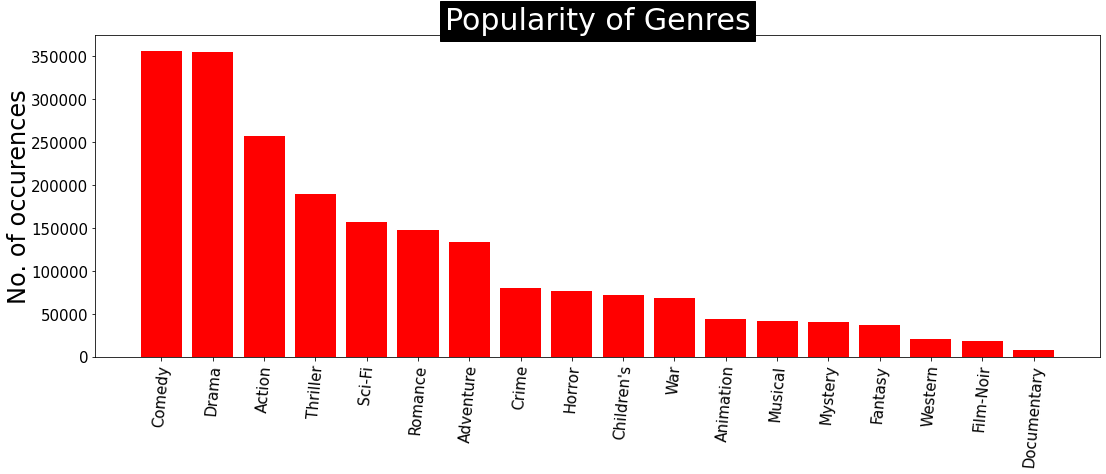

In [25]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in tocc]
x_axis = [k for k,i in enumerate(tocc)]
x_label = [i[0] for i in tocc]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

Observing the genre distribution from the movies lens sets the most populer genres are Comedy and drama, least liked being film Noir and documentry.
Least watched genre types could also be considered outliers.

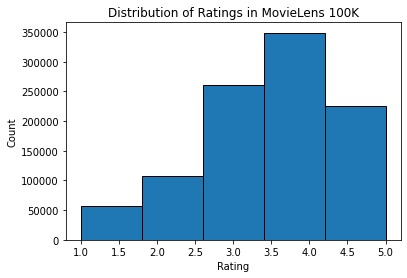

In [26]:
plt.hist(ratings['rating'], bins=5, ec='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in MovieLens 100K')
plt.show()

Observing the Movie ratings distribution we can say that the bell curve is observed in the distribution. 

Most of the rating lie around 3.5

In [0]:
movie_user_data = pd.merge(left=ratings, right=movies, left_on='movie_id', right_on='movie_id')
temp = movie_user_data['genres'].str.contains('Comedy')
comedy_movie_user_data = pd.DataFrame(movie_user_data[temp])
comedy_analysis = comedy_movie_user_data.groupby('title')['rating'].agg(['mean','median'])
comedy_analysis
temp = movie_user_data['genres'].str.contains('Drama')
drama_movie_user_data = pd.DataFrame(movie_user_data[temp])

In [0]:
mixed = []
gen = []
for i in range(0, len(genre_occurences)):
  gen = movie_data_ratings_data['genres'].str.contains(genre_occurences[i][0])
  new_data = pd.DataFrame(movie_data_ratings_data[gen])
  now = new_data['rating'].tolist()
  mixed.append(now)


In [29]:
gen = []
for i in range(0, len(genre_occurences)):
  gen += [genre_occurences[i][0]] 
gen

['Comedy',
 'Drama',
 'Action',
 'Thriller',
 'Sci-Fi',
 'Romance',
 'Adventure',
 'Crime',
 'Horror',
 "Children's",
 'War',
 'Animation',
 'Musical',
 'Mystery',
 'Fantasy',
 'Western',
 'Film-Noir',
 'Documentary']

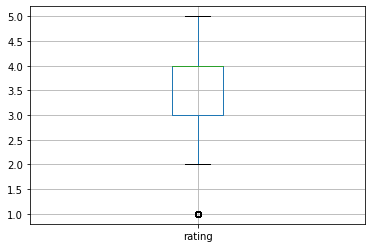

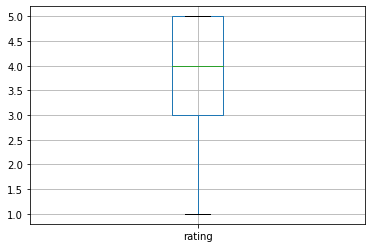

In [30]:
import pandas as pd
df = pd.DataFrame(comedy_movie_user_data['rating'])
df.plot.box(grid='True')
df = pd.DataFrame(drama_movie_user_data['rating'])
df.plot.box(grid='True')

Comedy and drama being the most movies common genre the rates is observes to fall around the 3.5-3 as observed in box plot.
As observed in question one there are few outliers such as Noir genre but the most popular genre seems to have higher rating. 
We can say that popular films are watched relatively more.